In [2]:
# load csv results
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# load data
df = pd.read_csv('/home/etaylor/code_projects/thesis/src/data_analysis/assessing_cannabis_maturity/experiment_1/exp1_with_hplc_data_results.csv')
df.head()

,Variety,Rep,Inf. Code,DAF,Visual amber ratio\n(%),Fresh weight (gr),Dry weight (gr),Total CBD,Total THC,Total CBG,...,number.1,L-clear_count,L-cloudy_count,L-amber_count,L-clear_normalized,L-cloudy_normalized,L-amber_normalized,day_number.1,flower_index.1,Plant_id.1
0,611,1,1,51,0.0,18.10,3.81,0.07,8.51,0.66,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,611,2,2,51,0.0,19.24,4.00,0.08,10.19,0.74,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,611,3,3,51,0.0,17.70,3.98,0.09,12.37,0.85,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,611,4,4,51,0.0,19.21,4.07,0.07,8.11,0.72,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,611,5,5,51,0.0,17.50,3.74,0.07,9.45,0.81,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
len(df.columns)
df.columns

Index(['Variety', 'Rep', 'Inf. Code', 'DAF', 'Visual amber ratio\n(%)',
       'Fresh weight (gr)', 'Dry weight (gr)', 'Total CBD', 'Total THC',
       'Total CBG', 'Total THCV', 'Total CBDV', 'Total CBGV', 'Total CBC',
       'Total Cannabinoids', 'location', 'number', 'G-clear_count',
       'G-cloudy_count', 'G-amber_count', 'G-clear_normalized',
       'G-cloudy_normalized', 'G-amber_normalized', 'day_number',
       'flower_index', 'Plant_id', 'VARIETY', 'location.1', 'number.1',
       'L-clear_count', 'L-cloudy_count', 'L-amber_count',
       'L-clear_normalized', 'L-cloudy_normalized', 'L-amber_normalized',
       'day_number.1', 'flower_index.1', 'Plant_id.1'],
      dtype='object')

## Organize Data

In [3]:
# Standardize column names
df.columns = (
    df.columns.str.strip()
    .str.lower()
    .str.replace(" ", "_")
    .str.replace("\n", "_")
    .str.replace(".1", "")
    .str.replace(".", "")
    .str.replace("-", "_")
    .str.replace("_(%)", "")
    .str.replace("(", "")
    .str.replace(")", "")
)

# fill 	dry_weight_(gr) null values with 0
df["dry_weight_gr"] = df["dry_weight_gr"].fillna(0)

# drop duplicate columns
df = df.loc[:,~df.columns.duplicated()]

In [4]:

# remove columns 'l_clear_count', 'l_cloudy_count','l_amber_count', 'l_clear_normalized', 'l_cloudy_normalized','l_amber_normalized'
remove_columns = ['l_clear_count', 'l_cloudy_count','l_amber_count', 'l_clear_normalized', 'l_cloudy_normalized','l_amber_normalized']

df = df.drop(remove_columns, axis=1)

df.columns

Index(['variety', 'rep', 'inf_code', 'daf', 'visual_amber_ratio',
       'fresh_weight_gr', 'dry_weight_gr', 'total_cbd', 'total_thc',
       'total_cbg', 'total_thcv', 'total_cbdv', 'total_cbgv', 'total_cbc',
       'total_cannabinoids', 'location', 'number', 'g_clear_count',
       'g_cloudy_count', 'g_amber_count', 'g_clear_normalized',
       'g_cloudy_normalized', 'g_amber_normalized', 'day_number',
       'flower_index', 'plant_id'],
      dtype='object')

In [5]:
# Handle missing values
df = df.dropna()

In [6]:
df['day_number'].unique()

array([1., 3., 4., 5., 6., 7., 9.])

## EDA

In [7]:
# Summarize the dataset
df.describe()

,rep,inf_code,daf,visual_amber_ratio,fresh_weight_gr,dry_weight_gr,total_cbd,total_thc,total_cbg,total_thcv,...,number,g_clear_count,g_cloudy_count,g_amber_count,g_clear_normalized,g_cloudy_normalized,g_amber_normalized,day_number,flower_index,plant_id
count,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,...,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000
mean,3.000000,134.740196,65.078431,4.299020,19.616858,3.867696,1.986814,9.471225,0.503088,0.031961,...,134.740196,425.519608,1241.980392,114.730392,0.277575,0.662790,0.059636,4.980392,254.151961,15.328431
std,1.421163,74.790915,8.668141,7.125462,6.502185,2.095786,2.876640,6.006132,0.198206,0.045117,...,74.790915,415.022612,874.682552,143.059569,0.215515,0.196038,0.058086,2.475418,148.799205,8.718079
min,1.000000,1.000000,51.000000,0.000000,6.050000,0.000000,0.060000,0.150000,0.160000,0.000000,...,1.000000,15.000000,10.000000,0.000000,0.010000,0.138300,0.000000,1.000000,1.000000,1.000000
25%,2.000000,81.750000,58.000000,0.000000,15.157250,2.875000,0.080000,3.310000,0.370000,0.000000,...,81.750000,143.250000,582.250000,23.000000,0.125450,0.603950,0.019900,3.000000,141.750000,8.000000
50%,3.000000,132.500000,65.000000,0.000000,18.780000,4.025000,0.100000,10.910000,0.465000,0.000000,...,132.500000,301.500000,1063.000000,66.500000,0.227050,0.704100,0.039050,5.000000,252.500000,15.000000
75%,4.000000,188.250000,72.000000,5.000000,24.267500,5.417500,4.185000,14.390000,0.630000,0.060000,...,188.250000,564.750000,1685.750000,144.250000,0.340925,0.799175,0.085800,7.000000,368.250000,23.000000
max,5.000000,270.000000,79.000000,30.000000,35.470000,8.380000,9.640000,20.730000,1.240000,0.180000,...,270.000000,2598.000000,4117.000000,931.000000,0.856700,0.975500,0.364200,9.000000,510.000000,30.000000


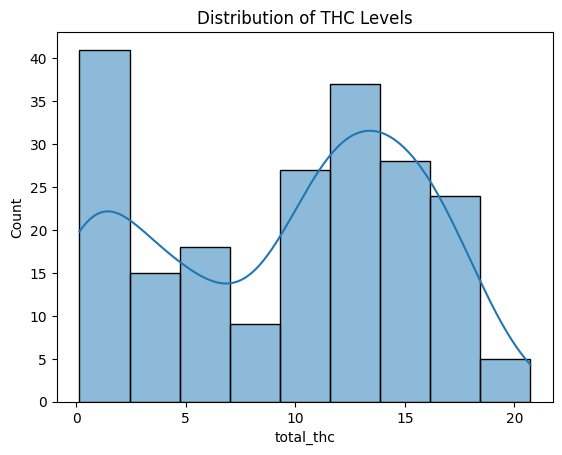

In [8]:
# Visualize the distribution of key variables
sns.histplot(df['total_thc'], kde=True)
plt.title('Distribution of THC Levels')
plt.show()


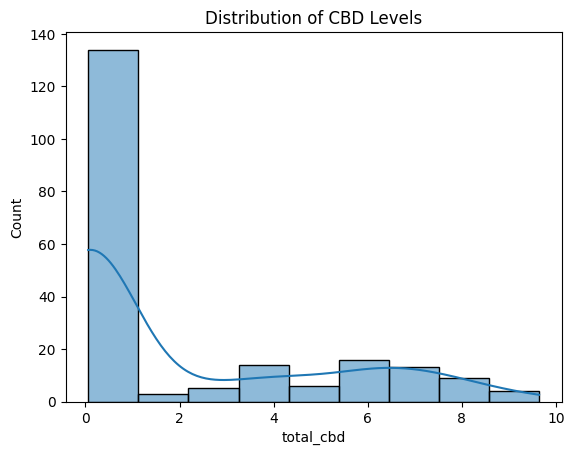

In [9]:
sns.histplot(df['total_cbd'], kde=True)
plt.title('Distribution of CBD Levels')
plt.show()

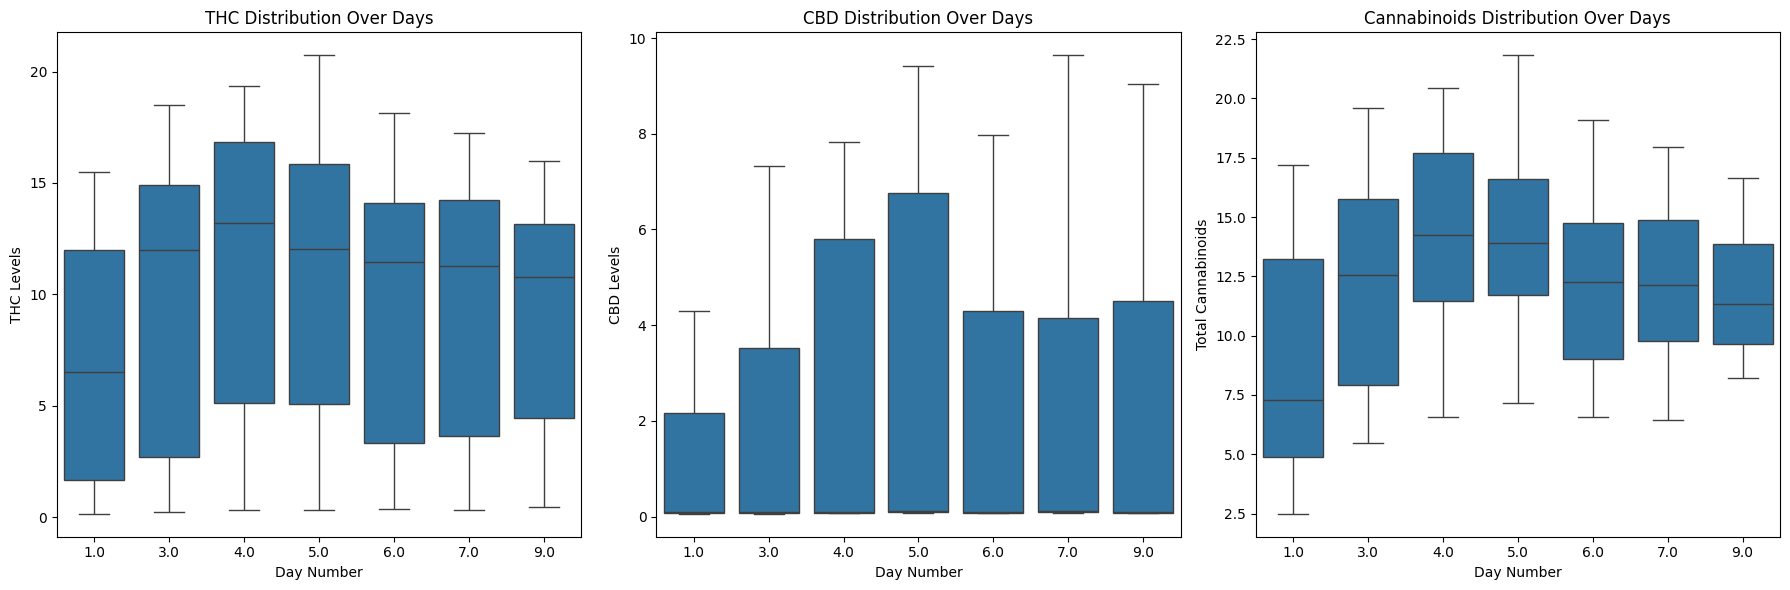

In [10]:
# Distribution of target variables over day_number
plt.figure(figsize=(18, 6))

# THC Distribution
plt.subplot(1, 3, 1)
sns.boxplot(x='day_number', y='total_thc', data=df)
plt.title('THC Distribution Over Days')
plt.xlabel('Day Number')
plt.ylabel('THC Levels')

# CBD Distribution
plt.subplot(1, 3, 2)
sns.boxplot(x='day_number', y='total_cbd', data=df)
plt.title('CBD Distribution Over Days')
plt.xlabel('Day Number')
plt.ylabel('CBD Levels')

# Cannabinoids Distribution
plt.subplot(1, 3, 3)
sns.boxplot(x='day_number', y='total_cannabinoids', data=df)
plt.title('Cannabinoids Distribution Over Days')
plt.xlabel('Day Number')
plt.ylabel('Total Cannabinoids')

plt.tight_layout()
plt.show()


### EDA on Trend Data

In [11]:
# Analyze trends over time
trend_data = df.groupby('day_number')[['total_thc', 'total_cbd', 'total_cannabinoids', 'g_cloudy_normalized', 'g_amber_normalized', 'g_clear_normalized']].mean().reset_index()
trend_data

,day_number,total_thc,total_cbd,total_cannabinoids,g_cloudy_normalized,g_amber_normalized,g_clear_normalized
0,1.0,7.038000,1.026333,8.925000,0.595233,0.042010,0.362763
1,3.0,9.792333,1.658000,12.142000,0.364913,0.023533,0.611557
2,4.0,11.168000,2.155000,14.095333,0.763053,0.039160,0.197793
3,5.0,10.378800,3.019600,14.246000,0.695816,0.072484,0.231716
4,6.0,9.589667,1.983333,12.237333,0.758300,0.065463,0.176223
5,7.0,9.468667,2.102000,12.183000,0.749223,0.072867,0.177903
6,9.0,8.998621,2.140690,11.721379,0.720417,0.105610,0.173969


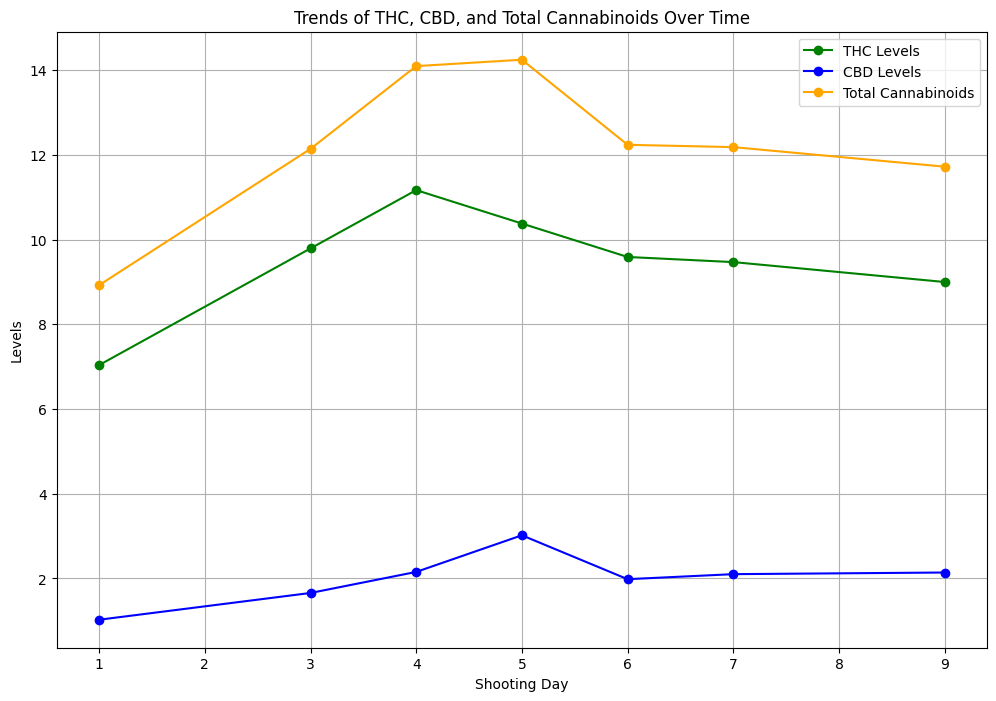

In [12]:
# Plot trends for THC, CBD, and total cannabinoids
plt.figure(figsize=(12, 8))
plt.plot(trend_data['day_number'], trend_data['total_thc'], marker='o', label='THC Levels', color='green')
plt.plot(trend_data['day_number'], trend_data['total_cbd'], marker='o', label='CBD Levels', color='blue')
plt.plot(trend_data['day_number'], trend_data['total_cannabinoids'], marker='o', label='Total Cannabinoids', color='orange')
plt.xlabel('Shooting Day')
plt.ylabel('Levels')
plt.title('Trends of THC, CBD, and Total Cannabinoids Over Time')
plt.legend()
plt.grid()
plt.show()

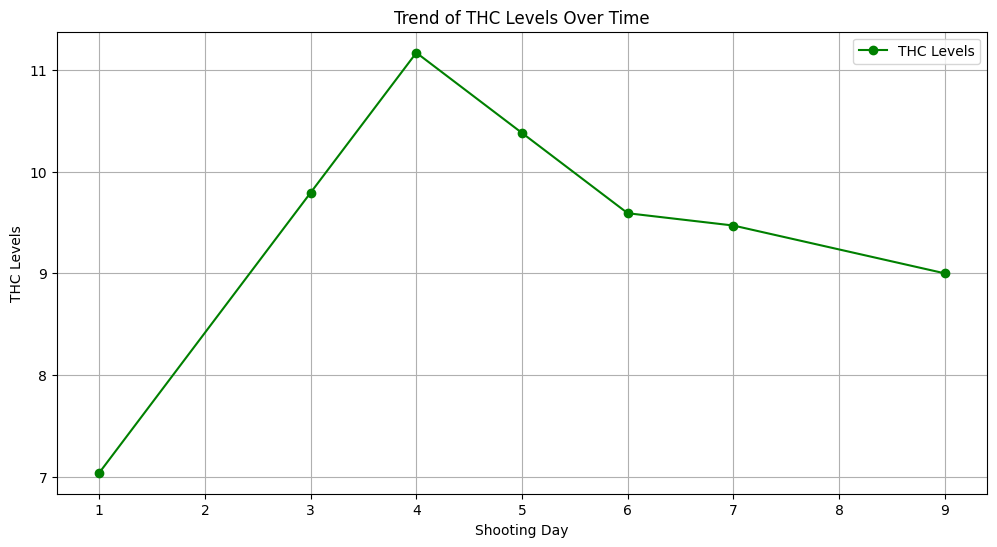

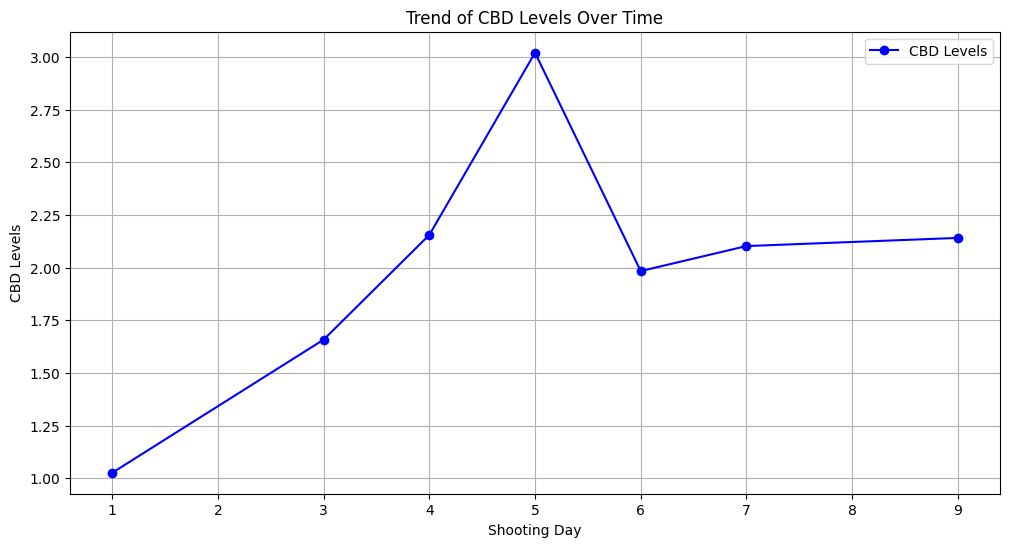

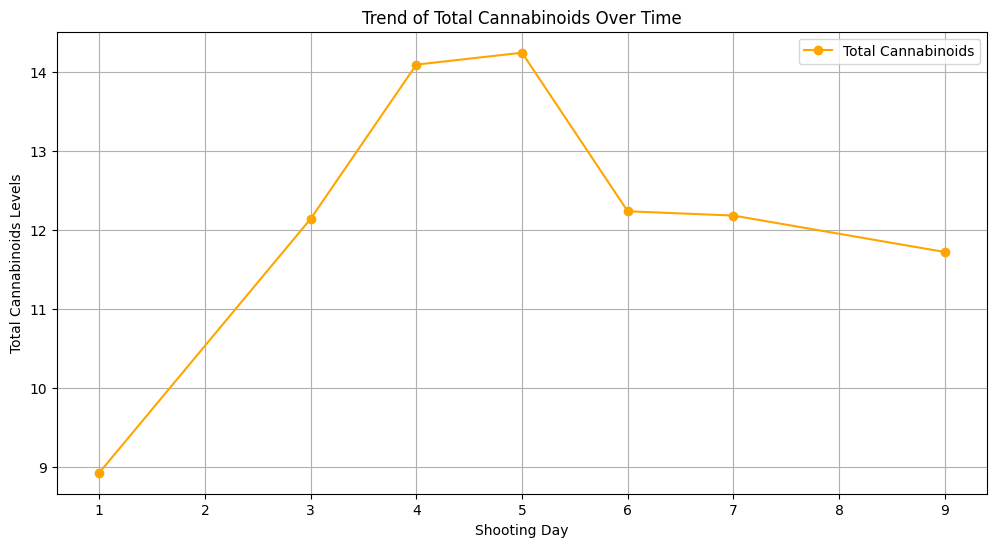

In [13]:
# Plot trends for THC
plt.figure(figsize=(12, 6))
plt.plot(trend_data['day_number'], trend_data['total_thc'], marker='o', label='THC Levels', color='green')
plt.xlabel('Shooting Day')
plt.ylabel('THC Levels')
plt.title('Trend of THC Levels Over Time')
plt.legend()
plt.grid()
plt.show()

# Plot trends for CBD
plt.figure(figsize=(12, 6))
plt.plot(trend_data['day_number'], trend_data['total_cbd'], marker='o', label='CBD Levels', color='blue')
plt.xlabel('Shooting Day')
plt.ylabel('CBD Levels')
plt.title('Trend of CBD Levels Over Time')
plt.legend()
plt.grid()
plt.show()

# Plot trends for Total Cannabinoids
plt.figure(figsize=(12, 6))
plt.plot(trend_data['day_number'], trend_data['total_cannabinoids'], marker='o', label='Total Cannabinoids', color='orange')
plt.xlabel('Shooting Day')
plt.ylabel('Total Cannabinoids Levels')
plt.title('Trend of Total Cannabinoids Over Time')
plt.legend()
plt.grid()
plt.show()

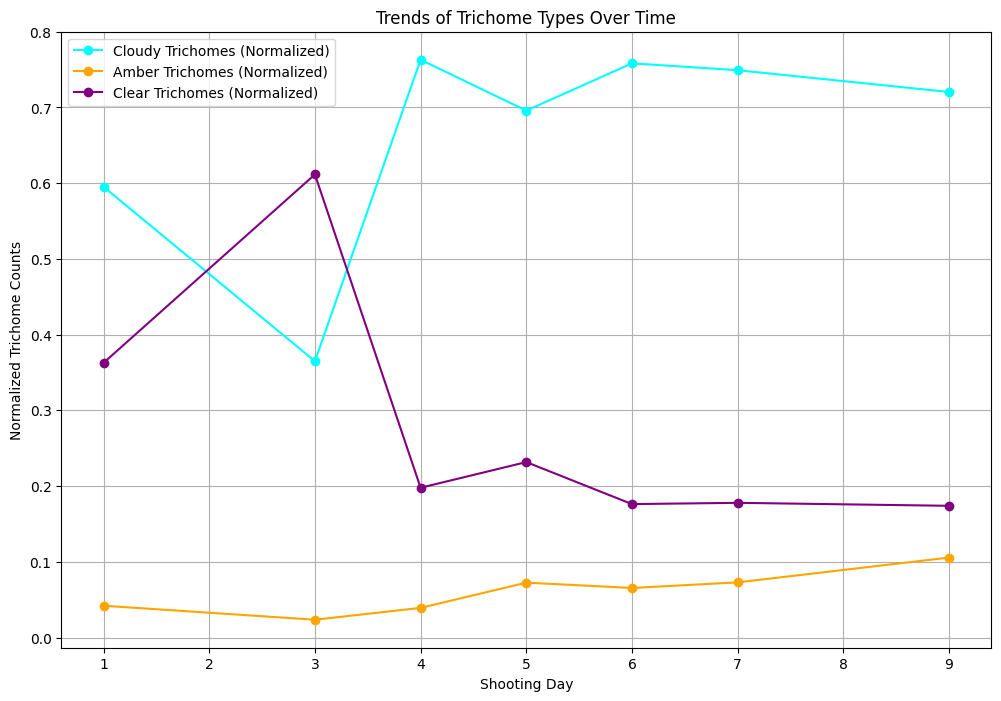

In [14]:
# Plot trends for trichome types
plt.figure(figsize=(12, 8))
plt.plot(trend_data['day_number'], trend_data['g_cloudy_normalized'], marker='o', label='Cloudy Trichomes (Normalized)', color='cyan')
plt.plot(trend_data['day_number'], trend_data['g_amber_normalized'], marker='o', label='Amber Trichomes (Normalized)', color='orange')
plt.plot(trend_data['day_number'], trend_data['g_clear_normalized'], marker='o', label='Clear Trichomes (Normalized)', color='purple')
plt.xlabel('Shooting Day')
plt.ylabel('Normalized Trichome Counts')
plt.title('Trends of Trichome Types Over Time')
plt.legend()
plt.grid()
plt.show()

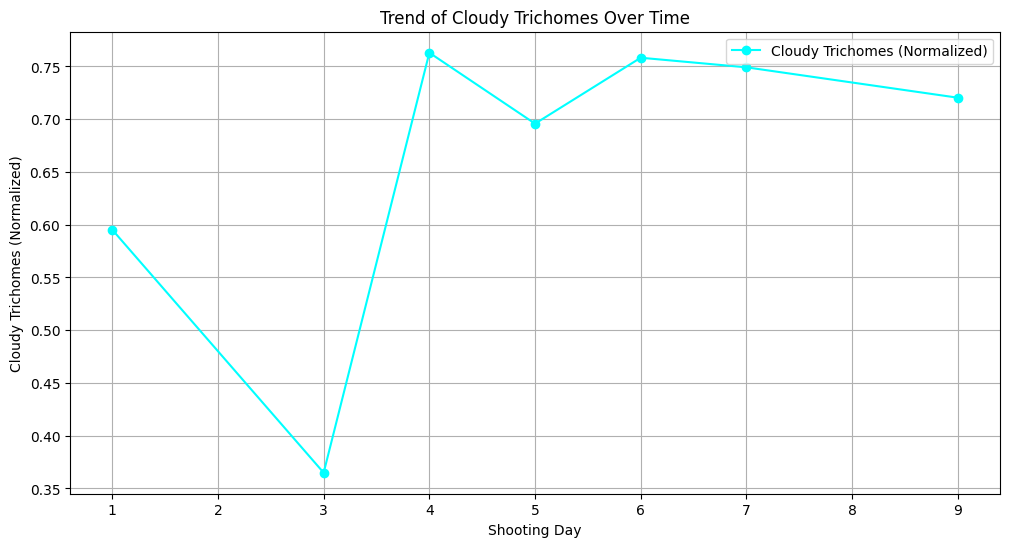

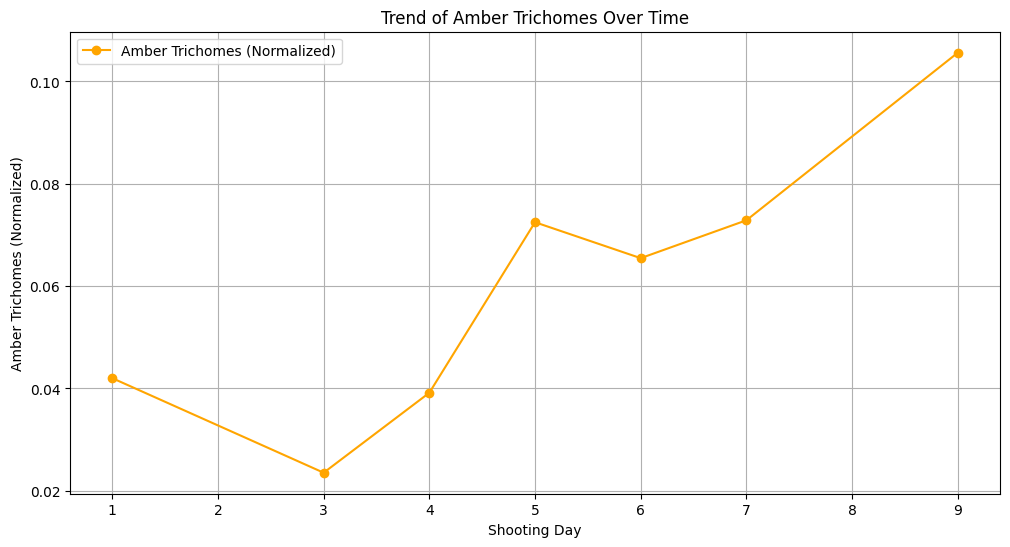

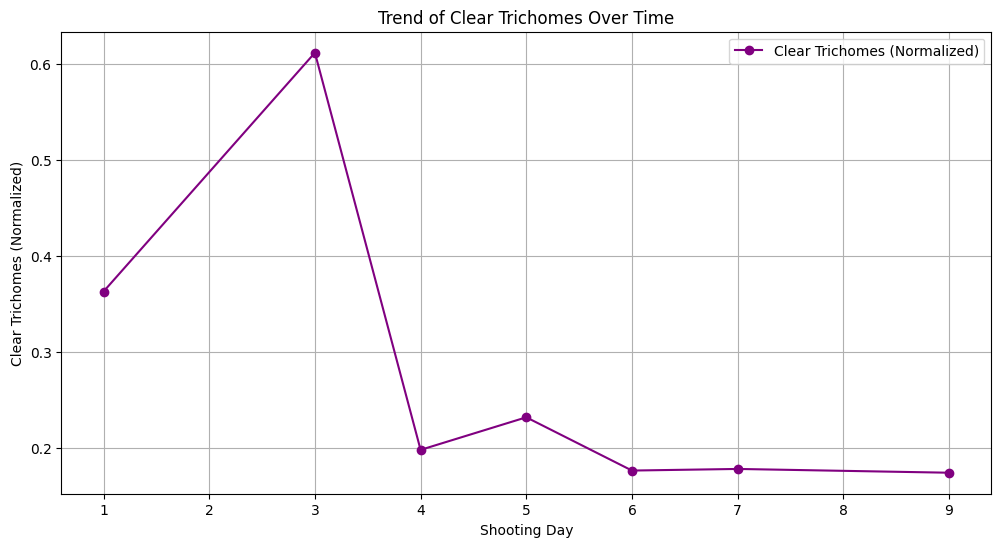

In [15]:
# Plot trends for Cloudy Trichomes
plt.figure(figsize=(12, 6))
plt.plot(trend_data['day_number'], trend_data['g_cloudy_normalized'], marker='o', label='Cloudy Trichomes (Normalized)', color='cyan')
plt.xlabel('Shooting Day')
plt.ylabel('Cloudy Trichomes (Normalized)')
plt.title('Trend of Cloudy Trichomes Over Time')
plt.legend()
plt.grid()
plt.show()

# Plot trends for Amber Trichomes
plt.figure(figsize=(12, 6))
plt.plot(trend_data['day_number'], trend_data['g_amber_normalized'], marker='o', label='Amber Trichomes (Normalized)', color='orange')
plt.xlabel('Shooting Day')
plt.ylabel('Amber Trichomes (Normalized)')
plt.title('Trend of Amber Trichomes Over Time')
plt.legend()
plt.grid()
plt.show()

# Plot trends for Clear Trichomes
plt.figure(figsize=(12, 6))
plt.plot(trend_data['day_number'], trend_data['g_clear_normalized'], marker='o', label='Clear Trichomes (Normalized)', color='purple')
plt.xlabel('Shooting Day')
plt.ylabel('Clear Trichomes (Normalized)')
plt.title('Trend of Clear Trichomes Over Time')
plt.legend()
plt.grid()

## Feature Engineer

In [24]:
df["cloudy_to_amber_ratio"] = df["g_cloudy_normalized"] / df["g_amber_normalized"]
df["amber_to_cloudy_ratio"] = df["g_amber_normalized"] / df["g_cloudy_normalized"]

# lets create a new feature with both g_cloudy_normalized and g_clear_normalized
df["g_cloudy_clear_normalized"] = df["g_cloudy_normalized"] + df["g_clear_normalized"]

# now lets calc the ratio with amber
df["cloudy_clear_to_amber_ratio"] = df["g_cloudy_clear_normalized"] / df["g_amber_normalized"]
df["amber_to_cloudy_clear_ratio"] = df["g_amber_normalized"] / df["g_cloudy_clear_normalized"]

## Correlation between trichome variables and THC/CBD level

Calculate correlations between trichome metrics (including lab) and lab results over time

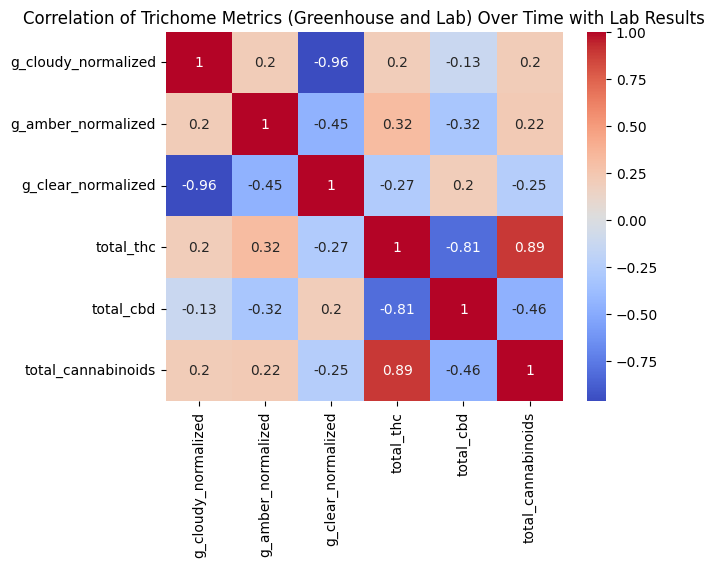

In [17]:
vanila_columns = [
    "g_cloudy_normalized",
    "g_amber_normalized",
    "g_clear_normalized",
    "total_thc",
    "total_cbd",
    "total_cannabinoids",
]

correlation_over_time = df[vanila_columns].corr()

# Display heatmap for correlations
sns.heatmap(correlation_over_time, annot=True, cmap="coolwarm")
plt.title(
    "Correlation of Trichome Metrics (Greenhouse and Lab) Over Time with Lab Results"
)
plt.show()

### Correlation Between Cloudy to Amber (and the opposite) to Target Variables

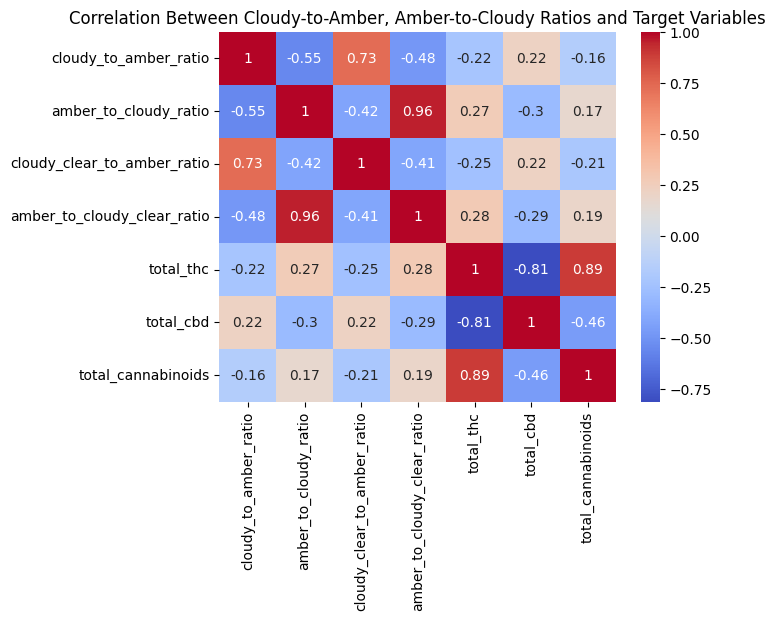

In [25]:
ratio_columns = [
    "cloudy_to_amber_ratio",
    "amber_to_cloudy_ratio",
    "cloudy_clear_to_amber_ratio",
    "amber_to_cloudy_clear_ratio",
    "total_thc",
    "total_cbd",
    "total_cannabinoids",
]

ratio_correlation_matrix = df[ratio_columns].corr()
sns.heatmap(ratio_correlation_matrix, annot=True, cmap="coolwarm")
plt.title(
    "Correlation Between Cloudy-to-Amber, Amber-to-Cloudy Ratios and Target Variables"
)
plt.show()

### Calc the correlation for each of the flower index

In [26]:
# Compare correlations across flower indices
vanila_correlation_results = {}
ratio_correlation_results = {}
for flower in df["variety"].unique():
    flower_df = df[df["variety"] == flower]
    vanila_correlation = flower_df[vanila_columns].corr()
    ratio_correlation = flower_df[ratio_columns].corr()
    vanila_correlation_results[flower] = vanila_correlation
    ratio_correlation_results[flower] = ratio_correlation
    print(f"Correlation Matrix for Flower Index {flower}:")

Correlation Matrix for Flower Index 611:
Correlation Matrix for Flower Index 616:
Correlation Matrix for Flower Index 202:
Correlation Matrix for Flower Index 1416-3:
Correlation Matrix for Flower Index 901-1:
Correlation Matrix for Flower Index 805-12:


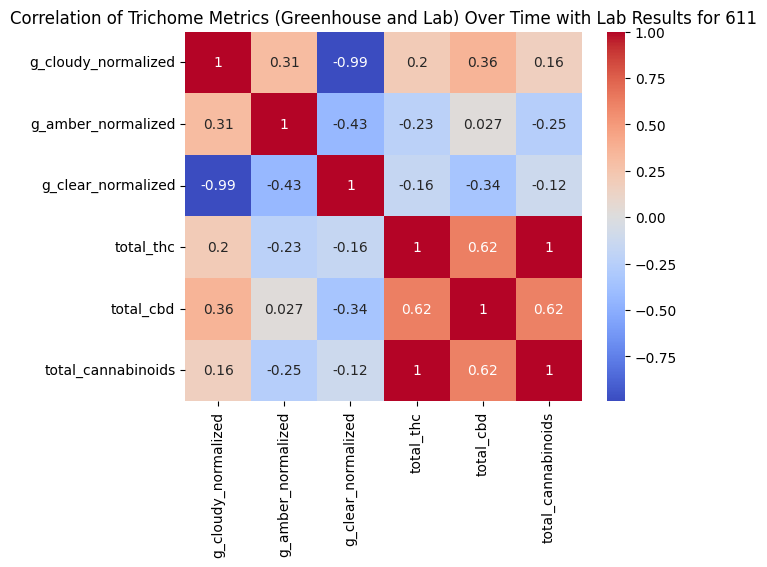

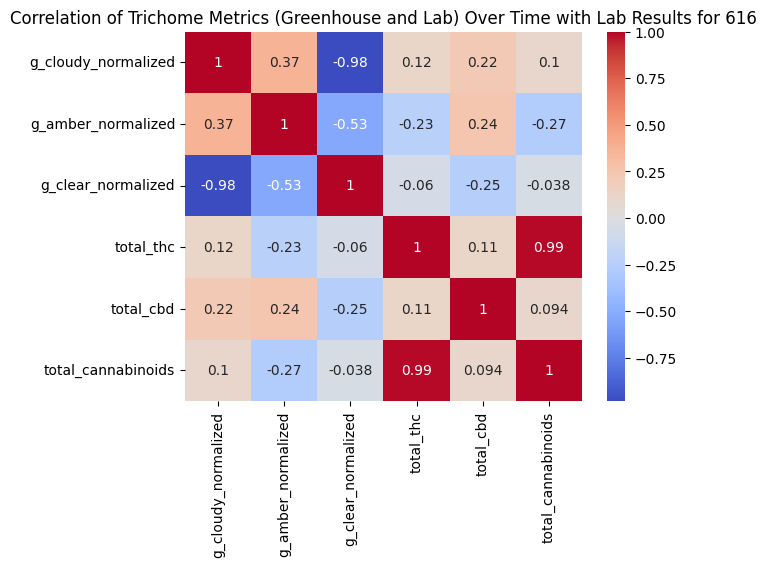

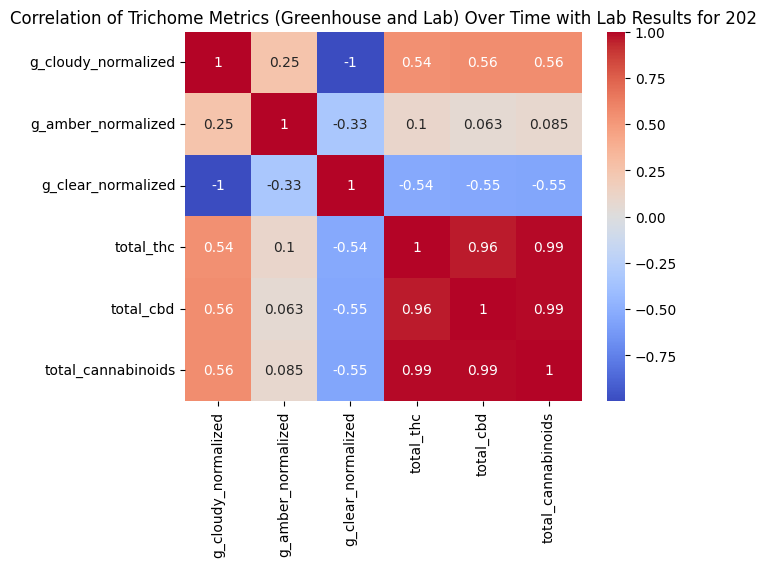

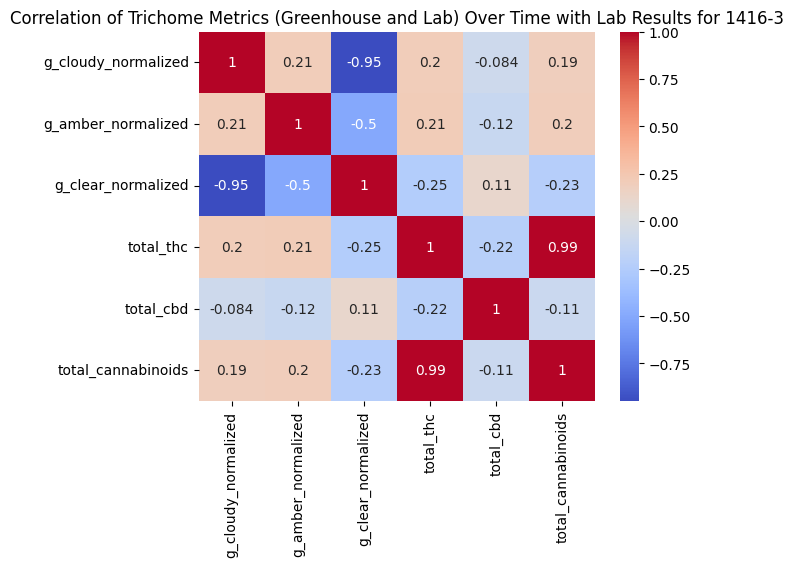

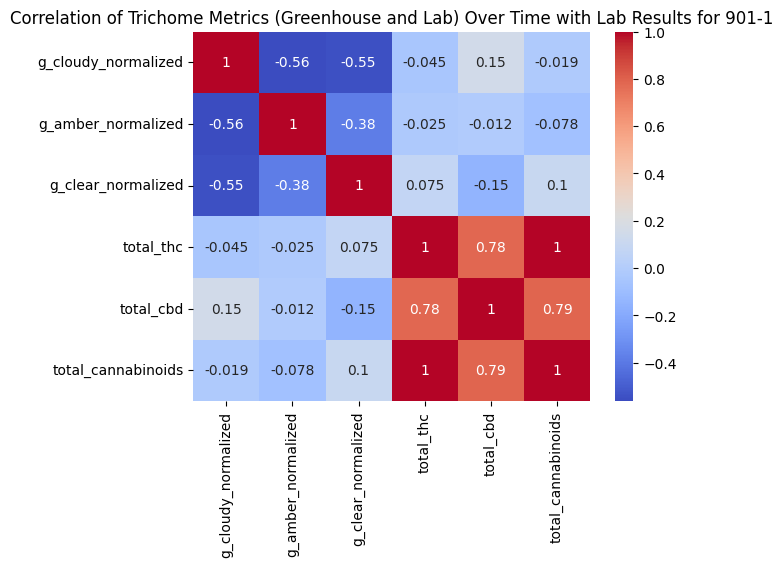

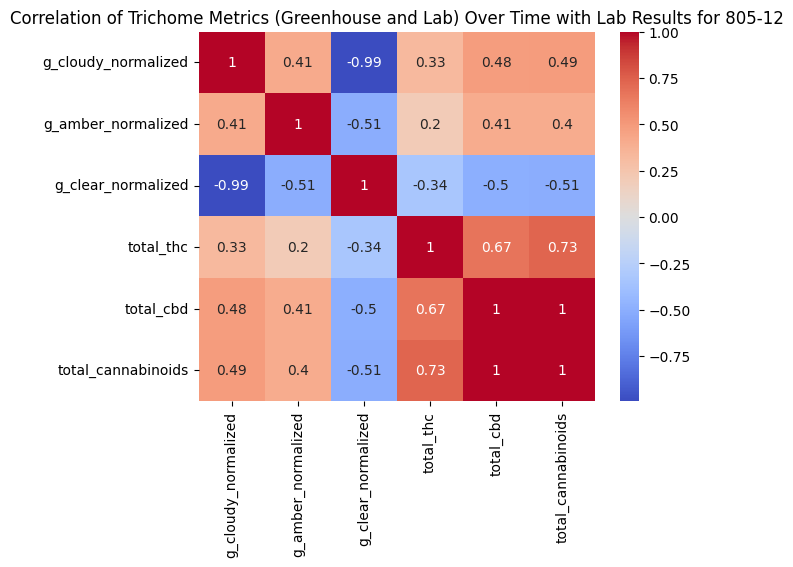

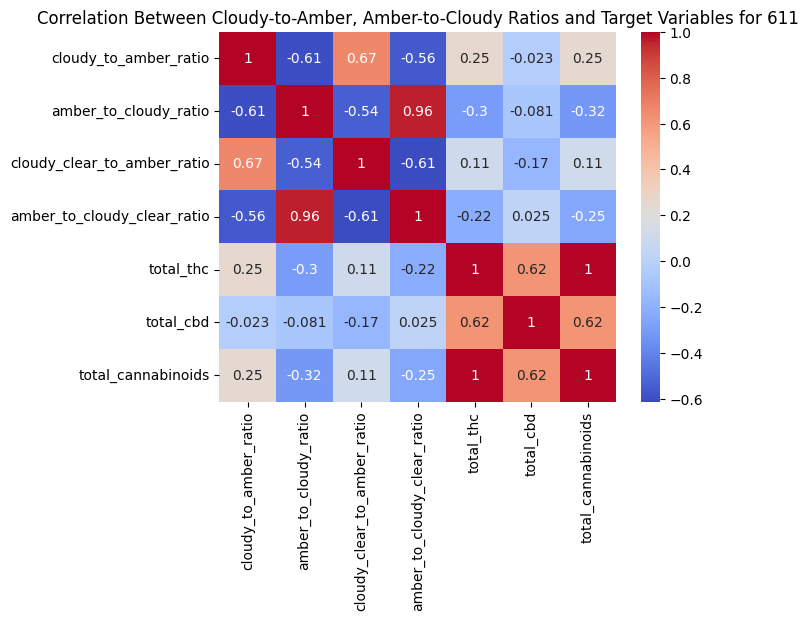

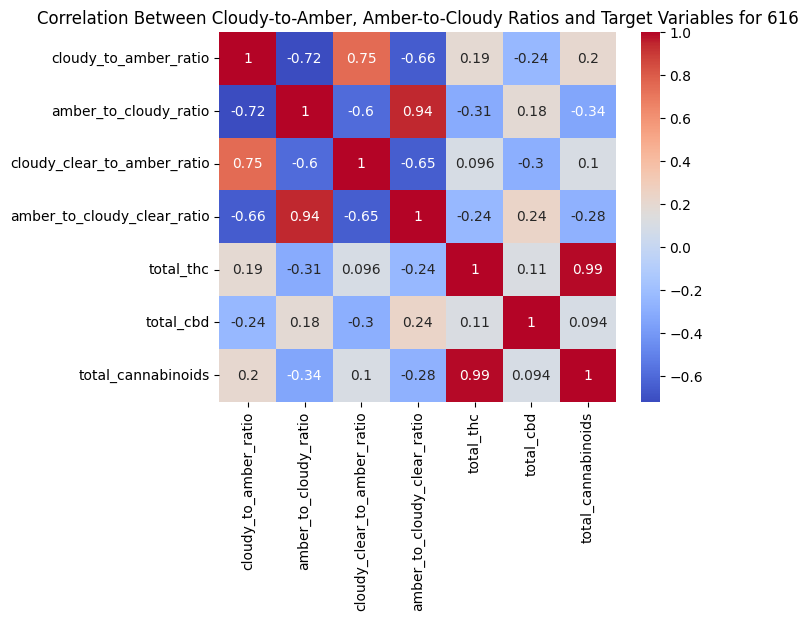

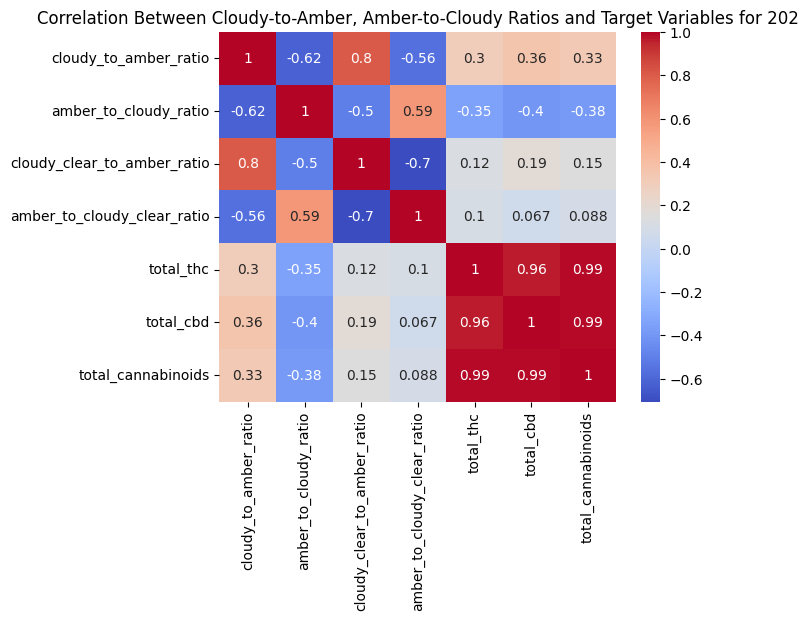

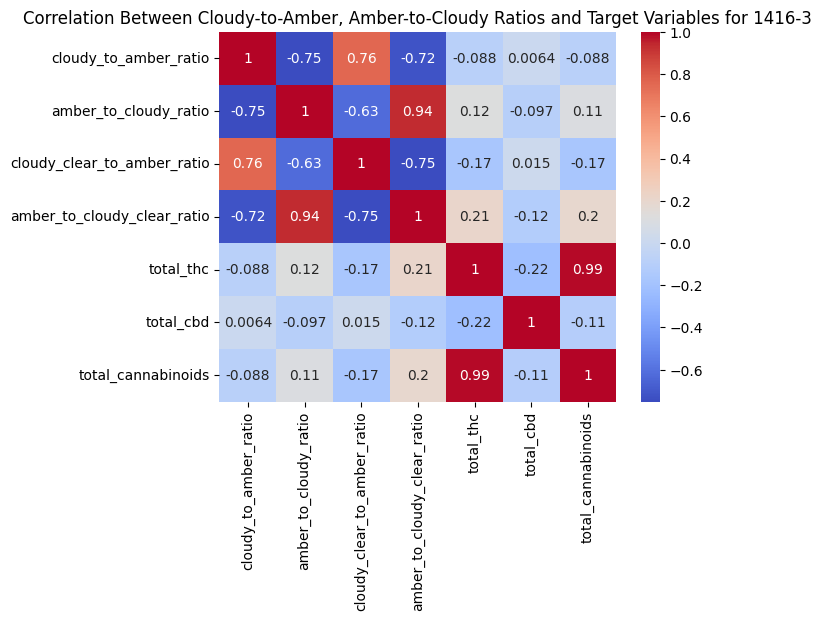

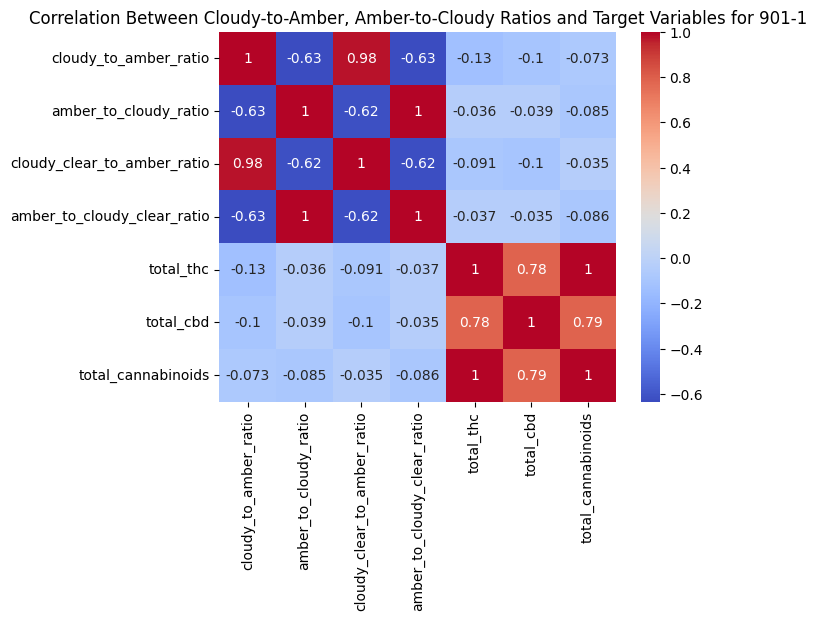

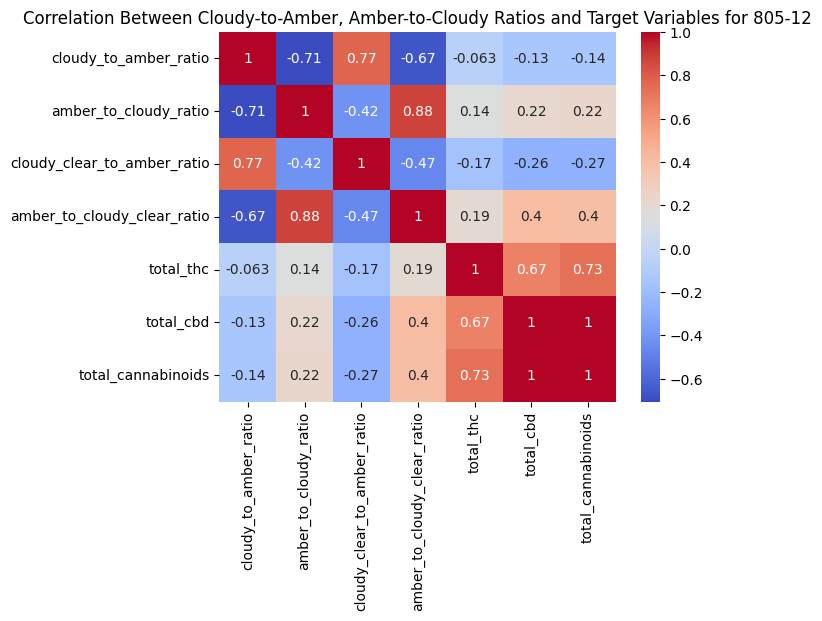

In [27]:
# plot the correlation matrix for the vanila and the ratio columns
for flower, correlation_matrix in vanila_correlation_results.items():
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
    plt.title(f"Correlation of Trichome Metrics (Greenhouse and Lab) Over Time with Lab Results for {flower}")
    plt.show()
    
for flower, correlation_matrix in ratio_correlation_results.items():
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
    plt.title(f"Correlation Between Cloudy-to-Amber, Amber-to-Cloudy Ratios and Target Variables for {flower}")
    plt.show()

In [36]:
df.columns

Index(['variety', 'rep', 'inf_code', 'daf', 'visual_amber_ratio',
       'fresh_weight_gr', 'dry_weight_gr', 'total_cbd', 'total_thc',
       'total_cbg', 'total_thcv', 'total_cbdv', 'total_cbgv', 'total_cbc',
       'total_cannabinoids', 'location', 'number', 'g_clear_count',
       'g_cloudy_count', 'g_amber_count', 'g_clear_normalized',
       'g_cloudy_normalized', 'g_amber_normalized', 'day_number',
       'flower_index', 'plant_id', 'cloudy_to_amber_ratio',
       'amber_to_cloudy_ratio', 'g_cloudy_clear_normalized',
       'cloudy_clear_to_amber_ratio', 'amber_to_cloudy_clear_ratio'],
      dtype='object')

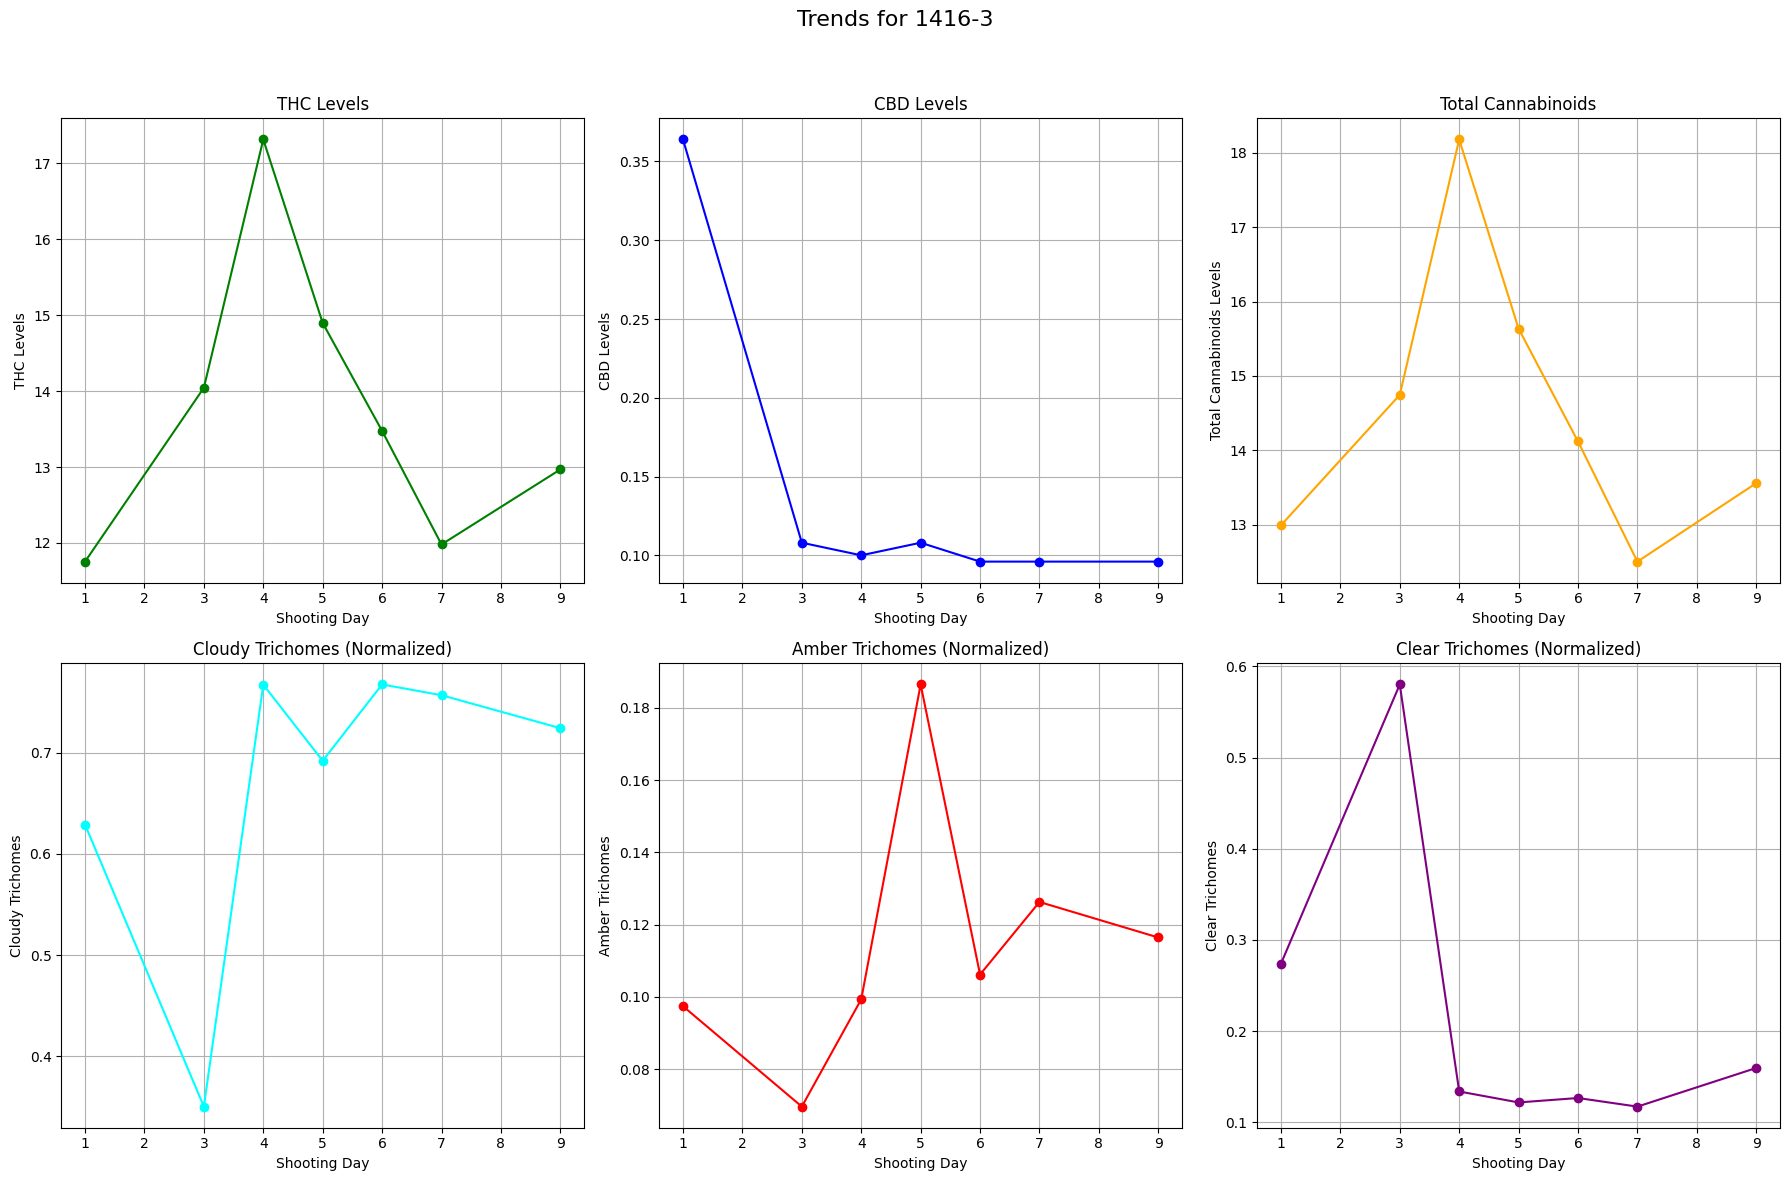

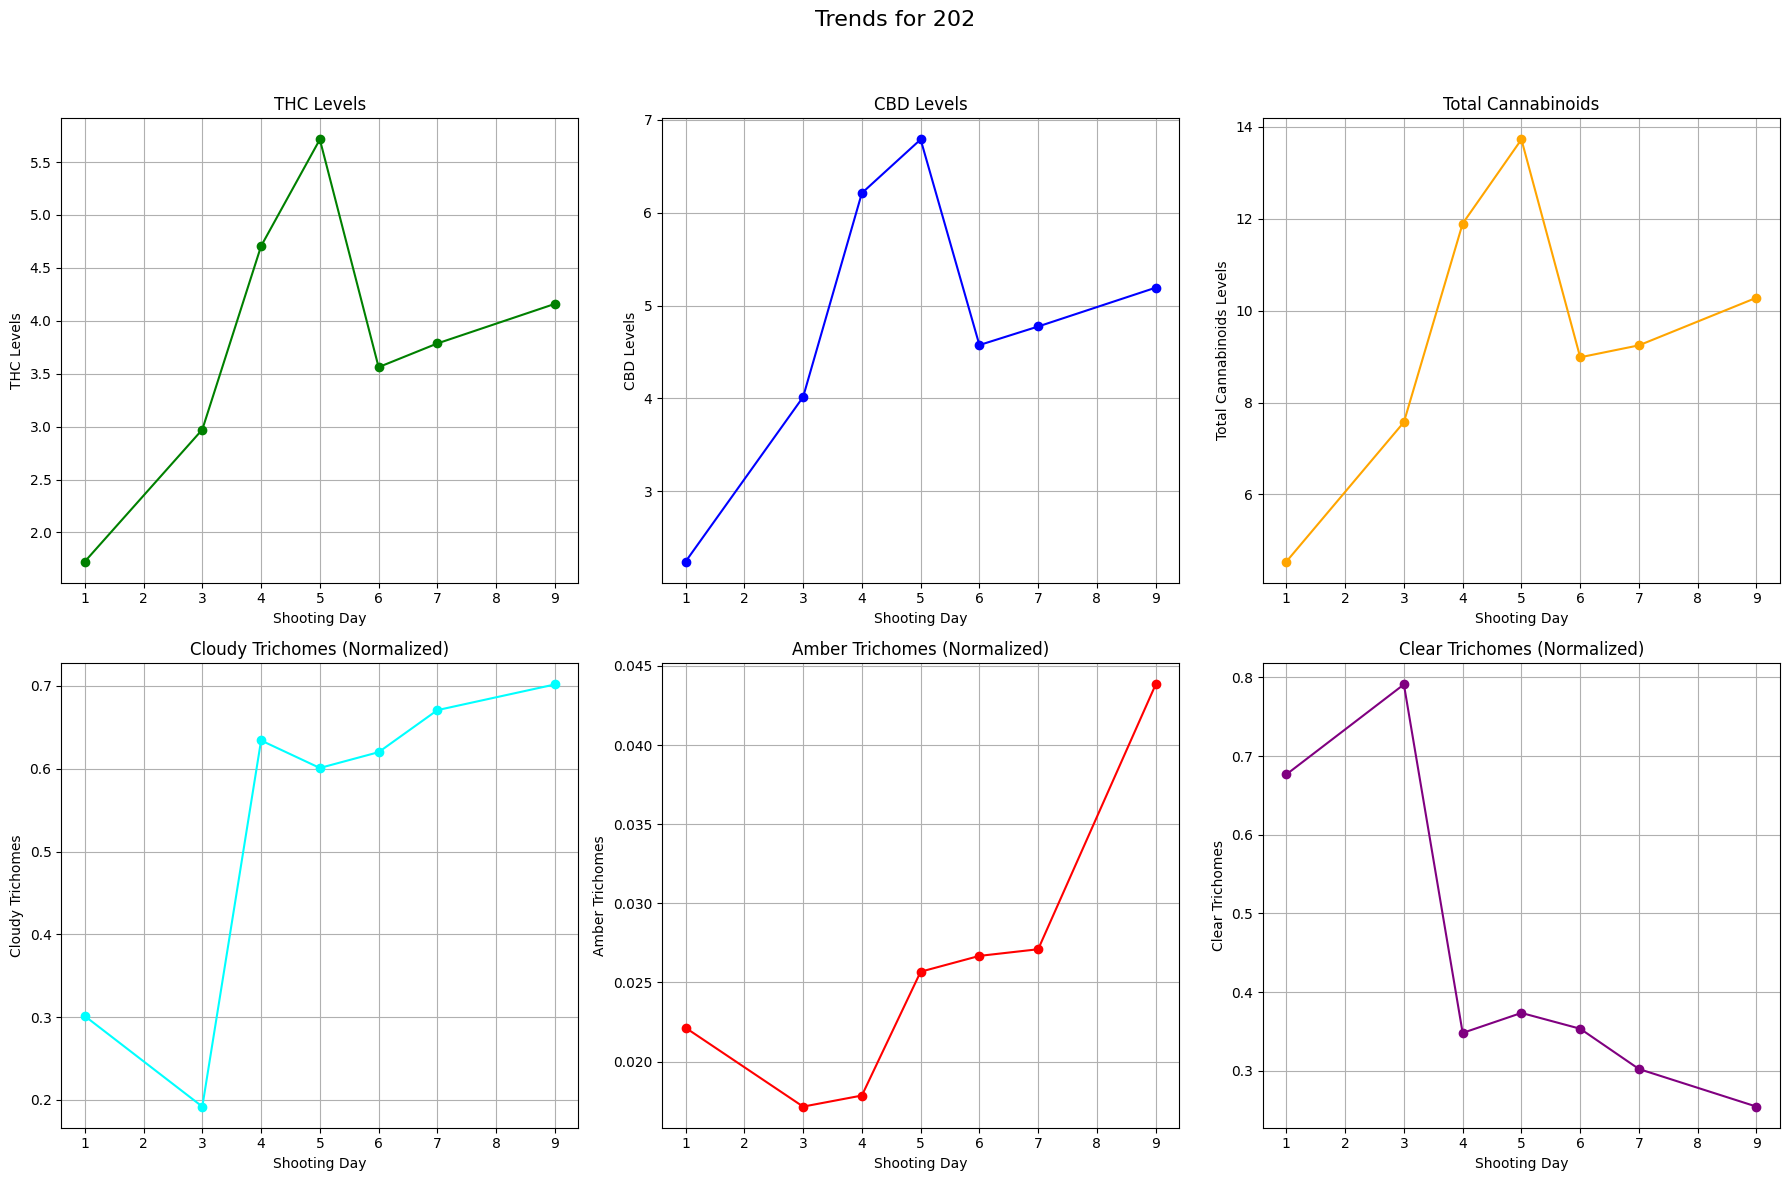

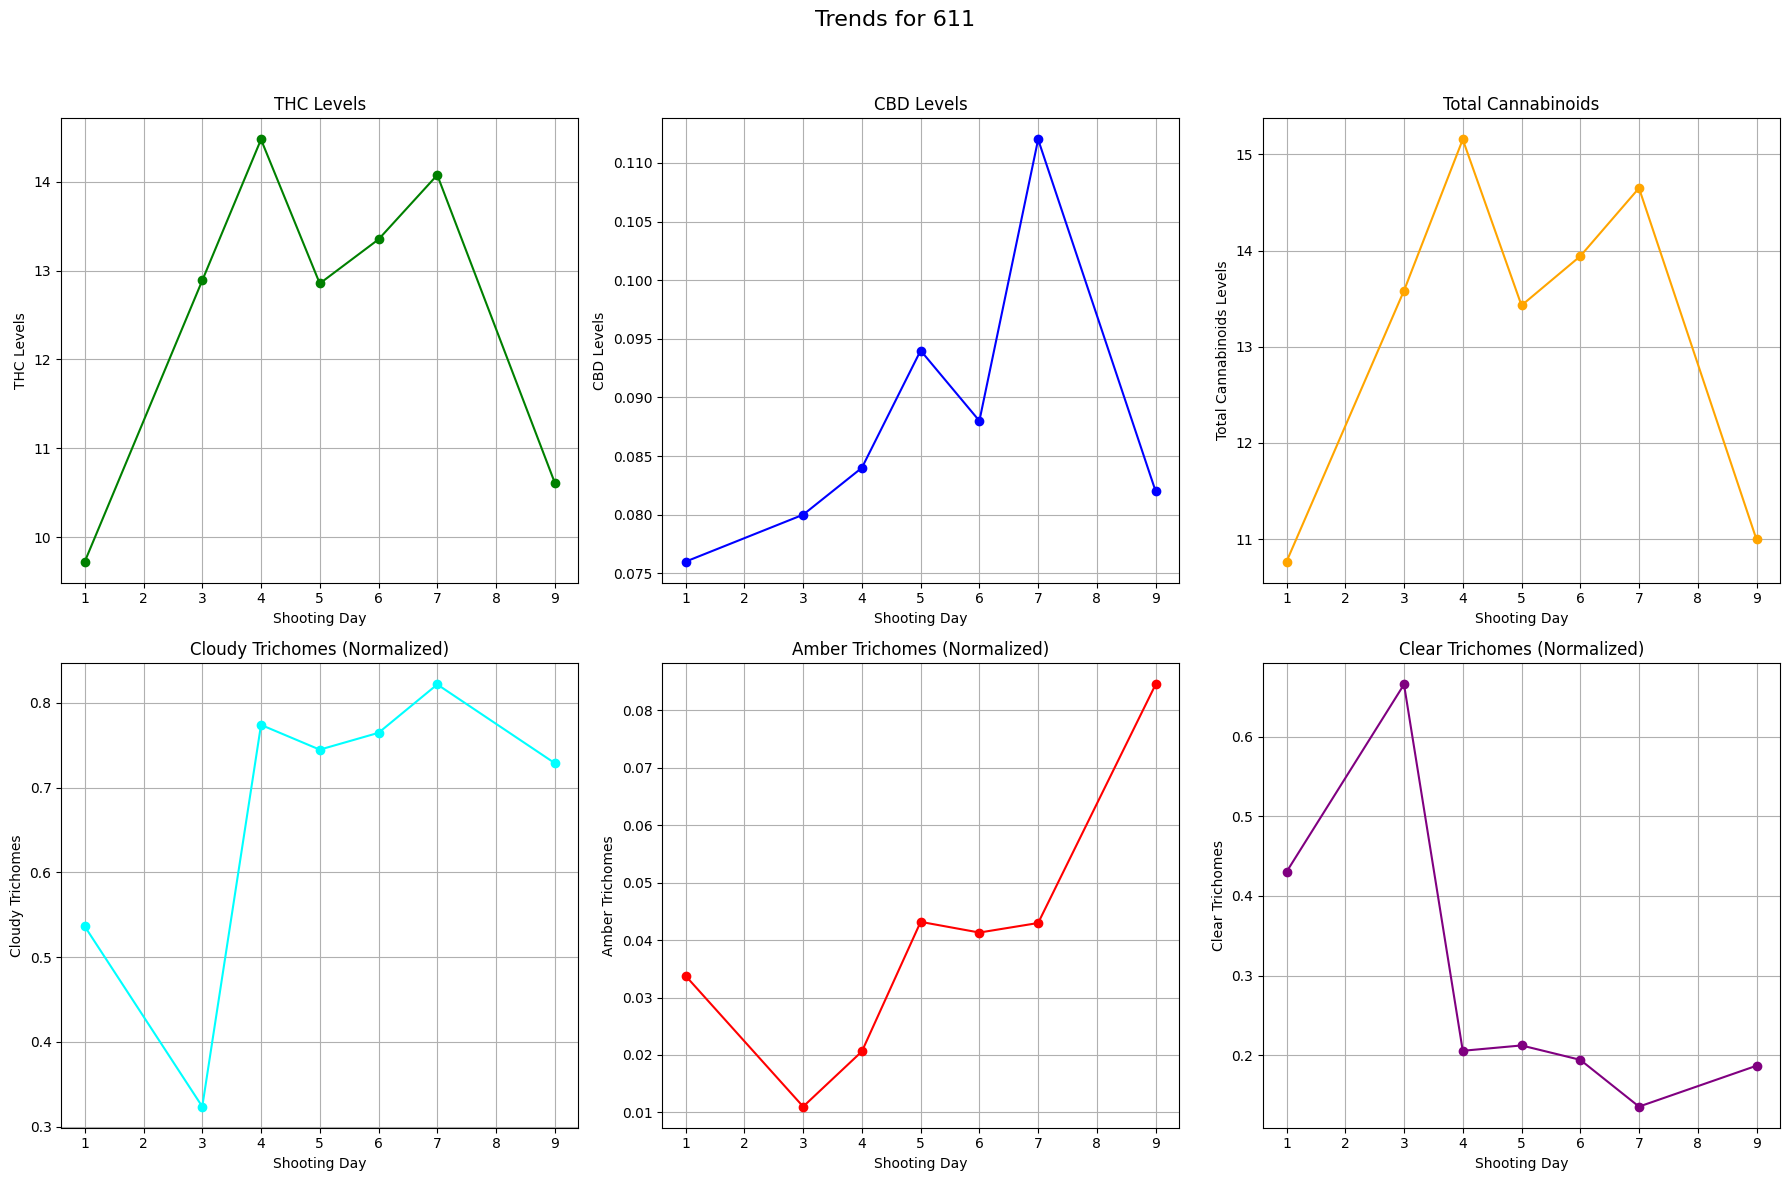

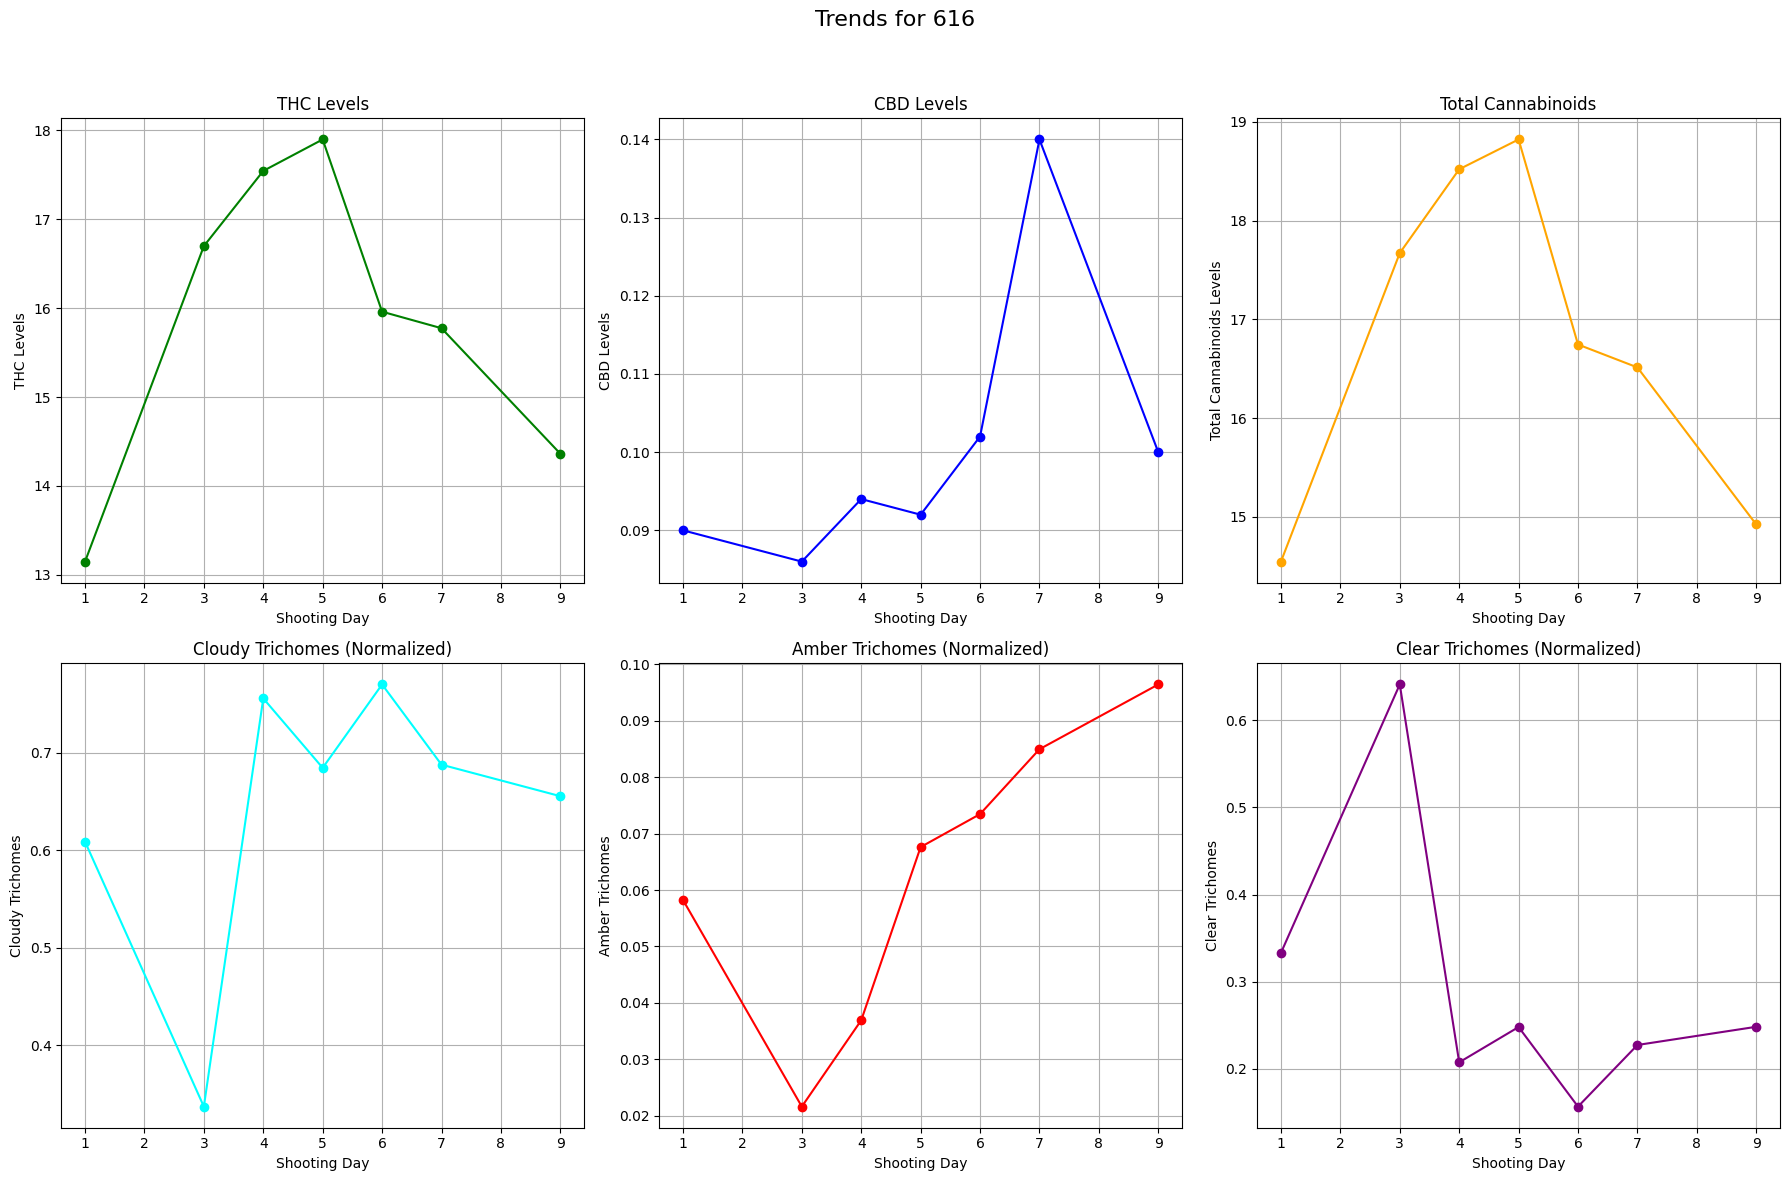

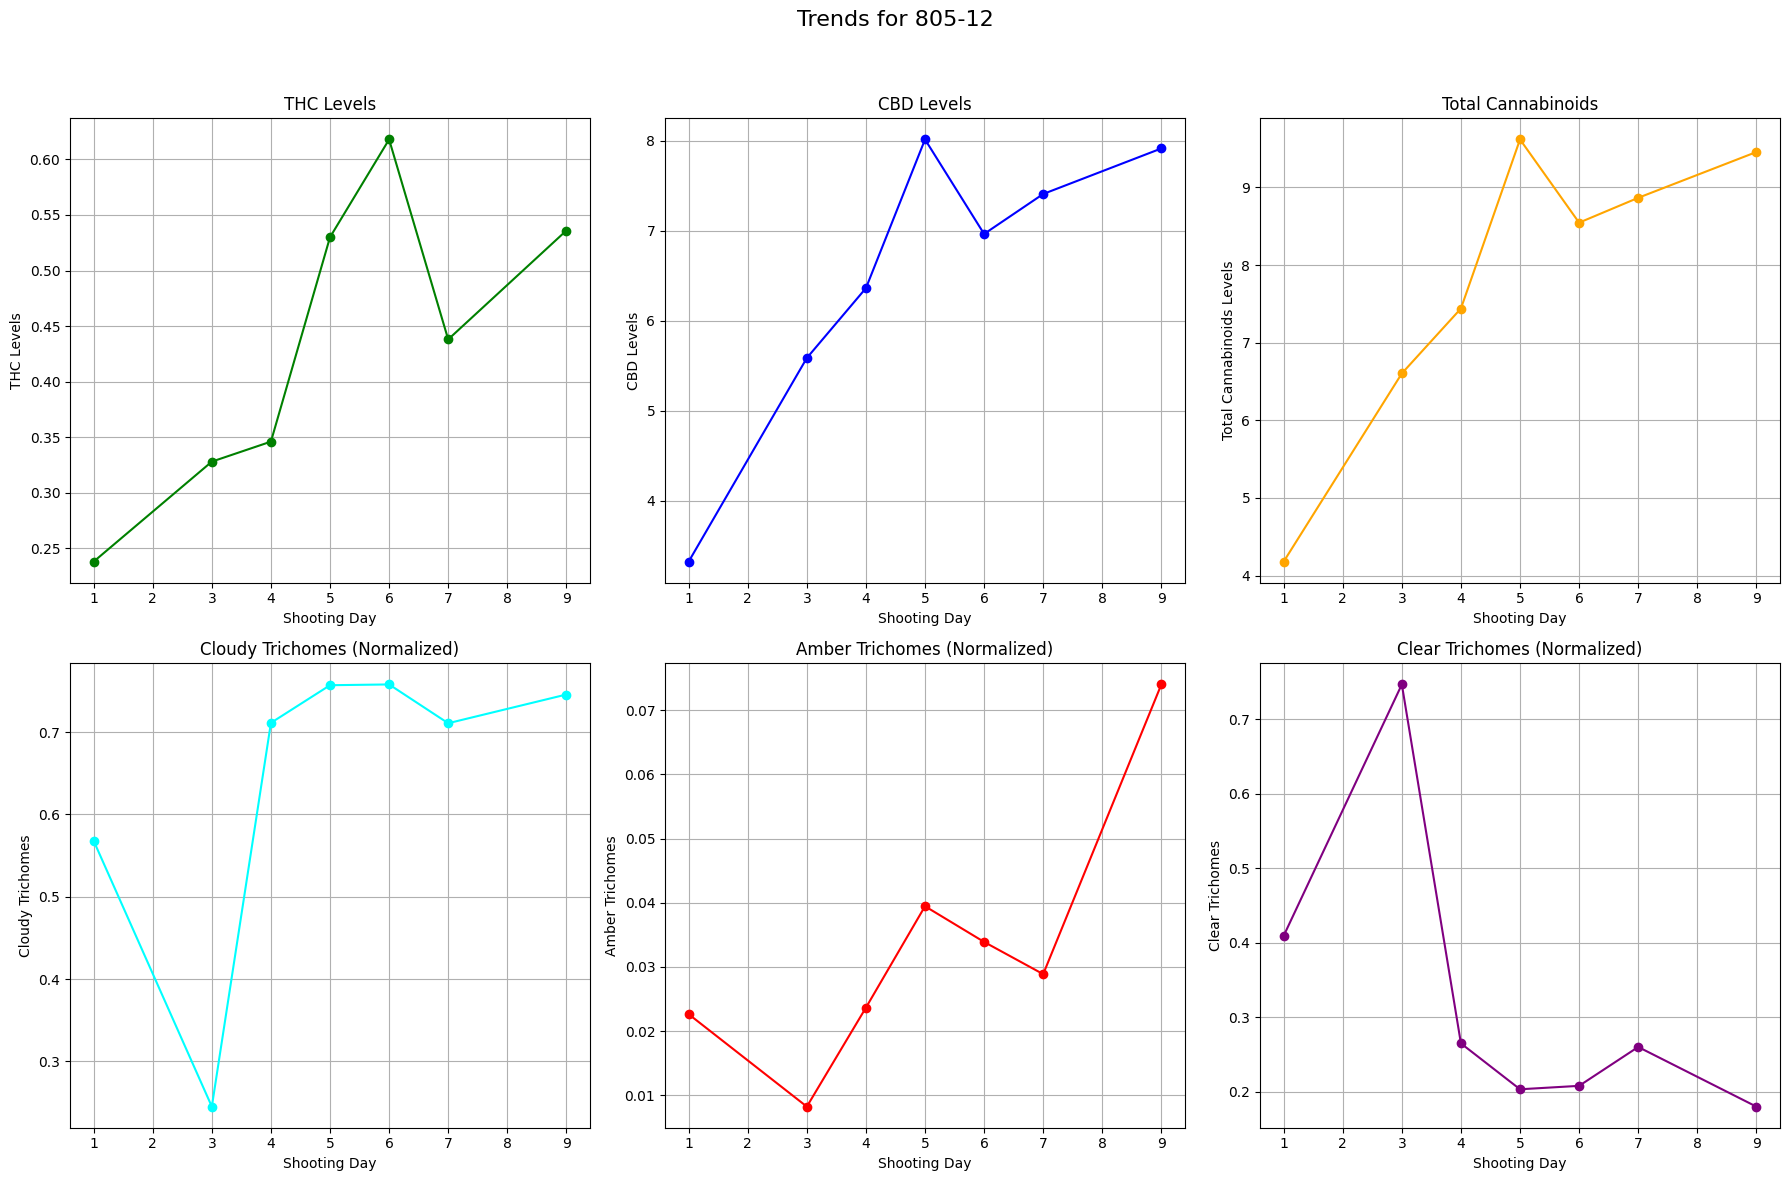

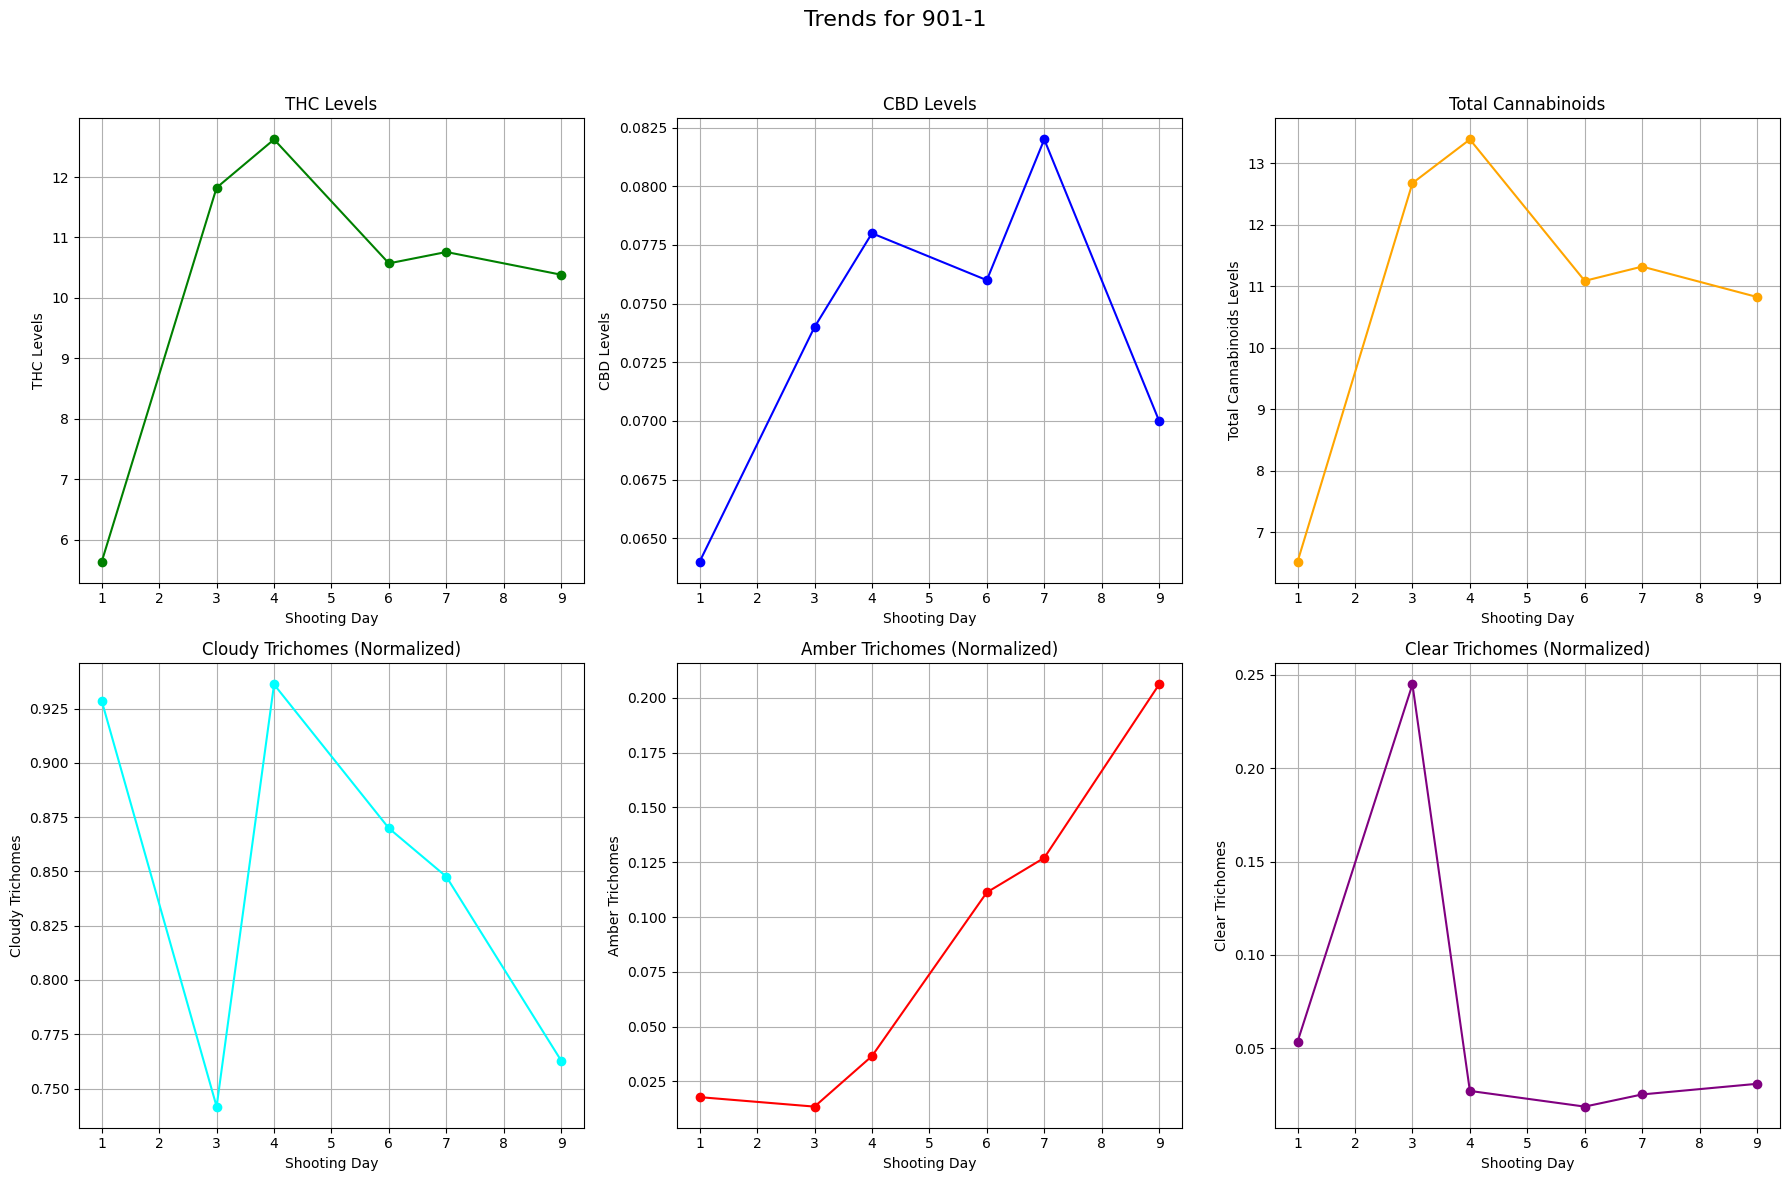

In [40]:
# Define numeric columns for plotting
numeric_columns = ['total_thc', 'total_cbd', 'total_cannabinoids']
trichome_columns = ['g_cloudy_normalized', 'g_amber_normalized', 'g_clear_normalized']

# Group by 'variety' and 'day_number', calculating the mean for numeric columns
grouped_by_variety = (
    df.groupby(['variety', 'day_number'])[numeric_columns + trichome_columns]
    .mean()
    .reset_index()
)

# Plot trends for each flower variety
for flower in grouped_by_variety['variety'].unique():
    flower_df = grouped_by_variety[grouped_by_variety['variety'] == flower]

    # Create a figure with 2 rows of subplots
    fig, axs = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle(f'Trends for {flower}', fontsize=16)

    # THC Levels
    axs[0, 0].plot(
        flower_df['day_number'], flower_df['total_thc'], marker='o', color='green'
    )
    axs[0, 0].set_title('THC Levels')
    axs[0, 0].set_xlabel('Shooting Day')
    axs[0, 0].set_ylabel('THC Levels')
    axs[0, 0].grid()

    # CBD Levels
    axs[0, 1].plot(
        flower_df['day_number'], flower_df['total_cbd'], marker='o', color='blue'
    )
    axs[0, 1].set_title('CBD Levels')
    axs[0, 1].set_xlabel('Shooting Day')
    axs[0, 1].set_ylabel('CBD Levels')
    axs[0, 1].grid()

    # Total Cannabinoids
    axs[0, 2].plot(
        flower_df['day_number'], flower_df['total_cannabinoids'], marker='o', color='orange'
    )
    axs[0, 2].set_title('Total Cannabinoids')
    axs[0, 2].set_xlabel('Shooting Day')
    axs[0, 2].set_ylabel('Total Cannabinoids Levels')
    axs[0, 2].grid()

    # Cloudy Trichomes
    axs[1, 0].plot(
        flower_df['day_number'], flower_df['g_cloudy_normalized'], marker='o', color='cyan'
    )
    axs[1, 0].set_title('Cloudy Trichomes (Normalized)')
    axs[1, 0].set_xlabel('Shooting Day')
    axs[1, 0].set_ylabel('Cloudy Trichomes')
    axs[1, 0].grid()

    # Amber Trichomes
    axs[1, 1].plot(
        flower_df['day_number'], flower_df['g_amber_normalized'], marker='o', color='red'
    )
    axs[1, 1].set_title('Amber Trichomes (Normalized)')
    axs[1, 1].set_xlabel('Shooting Day')
    axs[1, 1].set_ylabel('Amber Trichomes')
    axs[1, 1].grid()

    # Clear Trichomes
    axs[1, 2].plot(
        flower_df['day_number'], flower_df['g_clear_normalized'], marker='o', color='purple'
    )
    axs[1, 2].set_title('Clear Trichomes (Normalized)')
    axs[1, 2].set_xlabel('Shooting Day')
    axs[1, 2].set_ylabel('Clear Trichomes')
    axs[1, 2].grid()

    # Adjust layout
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


## Perform regression to predict THC levels based on trichome metrics

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error